In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#In this file there are 3 main cells, the 1st cell is related to the rent model and the 2nd and 3rd is related to de sale model

In [2]:
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import xgboost as xgb
import pickle


regr = LinearRegression()


In [3]:
dfrent = pd.read_csv('../Project-5-scikitlearn/rent.csv')
dfsale = pd.read_csv('../Project-5-scikitlearn/sale.csv')

dfsale.drop(columns = ['Unnamed: 0','propertyCode','operation','priceByArea']) 
dfrent.drop(columns = ['Unnamed: 0','propertyCode','operation','priceByArea'])

dfsale[['price','size','floorNumeric']] = dfsale[['price','size','floorNumeric']].astype(int) #specifically this columns convert to integer
dfrent[['price','size','floorNumeric']] = dfrent[['price','size','floorNumeric']].astype(int)

rentdummy = pd.get_dummies(dfrent)
saledummy = pd.get_dummies(dfsale)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(rentdummy[['size', 'rooms', 'bathrooms', 'latitude', 'longitude', 'floorNumeric', 'propertyType_duplex','propertyType_flat', 'propertyType_penthouse', 'propertyType_studio']], rentdummy['price'], test_size=0.25,train_size=0.75, random_state=2)


#standardized
x_train_standar = StandardScaler().fit_transform(x_train)
x_test_standar = StandardScaler().fit_transform(x_test)

y_train_standar = StandardScaler().fit_transform(np.array(y_train).reshape(-1,1))
y_test_standar = StandardScaler().fit_transform(np.array(y_test).reshape(-1,1))

y_train_shaped = np.array(y_train).reshape(-1,1)

best_acc = []
acc_list = []


model1 = regr.fit(x_train, y_train_shaped) #Linear model with raw data
cv_acc = cross_validate(model1, x_train, y_train, cv=10)['test_score'].mean()
best_acc.append([cv_acc, 'regression raw'])
acc_list.append(cv_acc)

model2 = regr.fit(x_train_standar, y_train_standar)#Linear model with standard data
cv_acc = cross_validate(model2, x_train_standar, y_train_standar, cv=10)['test_score'].mean()
best_acc.append([cv_acc, 'regression standard'])
acc_list.append(cv_acc)


for depth in range(5,11): #Decision tree loop for raw data
        treereg = tree.DecisionTreeRegressor(max_depth=depth)
        model = treereg.fit(x_train, y_train)
        cv_acc = cross_validate(model, x_train, y_train, cv=10)['test_score'].mean()
        best_acc.append([cv_acc,'tree raw', depth])
        acc_list.append(cv_acc)

for depth in range(5,11): #Decision tree loop for standard data
        treereg = tree.DecisionTreeRegressor(max_depth=depth)
        model = treereg.fit(x_train_standar, y_train_standar)
        cv_acc = cross_validate(model, x_train, y_train, cv=10)['test_score'].mean()
        best_acc.append([cv_acc,'tree standard', depth])
        acc_list.append(cv_acc)


for best in best_acc:
        if best[0] == max(acc_list):
                print("best",best)
        elif best[0]== min(acc_list):
                print("worst", best)



#The cross validation indicates that for the rent model, we will use regression and raw data
rentmodel = regr.fit(x_train, y_train)

rent_prediction = rentmodel.predict(x_test)

r2_score(y_test, rent_prediction) #0.7930808681611295


#Testing with more random data the best model

test_rent = pd.read_csv('../Project-5-scikitlearn/rent_test_cleaned.csv')
test_rent.drop(columns = ['Unnamed: 0','propertyCode','operation','priceByArea'],inplace =True)
test_rent[['price','size','floorNumeric']] = test_rent[['price','size','floorNumeric']].astype(int)
test_rent_dummy = pd.get_dummies(test_rent)
test_rent_dummy

predict = rentmodel.predict(test_rent_dummy[['size', 'rooms', 'bathrooms', 'latitude', 'longitude', 'floorNumeric', 'propertyType_duplex','propertyType_flat', 'propertyType_penthouse', 'propertyType_studio']])

r2_score(test_rent_dummy['price'], predict)#0.7023190701609721

best_acc

best [0.6851819708713187, 'regression raw']
worst [0.35535639930498186, 'tree standard', 10]


[[0.6851819708713187, 'regression raw'],
 [0.6844539562120555, 'regression standard'],
 [0.5257499874660199, 'tree raw', 5],
 [0.4958274209019434, 'tree raw', 6],
 [0.4188921946348736, 'tree raw', 7],
 [0.4106536298624045, 'tree raw', 8],
 [0.37626958536398813, 'tree raw', 9],
 [0.39872488439462567, 'tree raw', 10],
 [0.4939784780473467, 'tree standard', 5],
 [0.5003592172437232, 'tree standard', 6],
 [0.43619073157071914, 'tree standard', 7],
 [0.4048197655645255, 'tree standard', 8],
 [0.36942268019716185, 'tree standard', 9],
 [0.35535639930498186, 'tree standard', 10]]

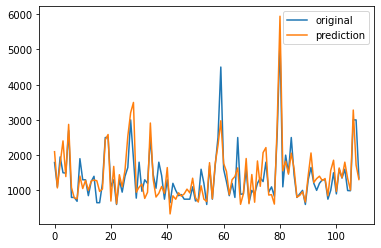

In [8]:
x_ax = range(len(predict))
plt.plot(x_ax, test_rent_dummy['price'], label='original')
plt.plot(x_ax, predict, label='prediction')
plt.legend()
plt.show()

In [1]:
#saving model

filename_rent = 'rent_model.sav'
pickle.dump(rentmodel, open(filename_rent,'wb'))


In [7]:
x_trainsale, x_testsale, y_trainsale, y_testsale = train_test_split(saledummy[['size', 'rooms', 'bathrooms', 'latitude', 'longitude', 'floorNumeric', 'propertyType_duplex','propertyType_flat', 'propertyType_penthouse', 'propertyType_studio']], saledummy['price'], test_size=0.25 ,train_size=0.75, random_state= 3)


#standardized
x_train_standarsale = StandardScaler().fit_transform(x_trainsale)
x_test_standarsale = StandardScaler().fit_transform(x_testsale)

y_train_standarsale = StandardScaler().fit_transform(np.array(y_trainsale).reshape(-1,1))
y_test_standarsale = StandardScaler().fit_transform(np.array(y_testsale).reshape(-1,1))

y_train_shapedsale = np.array(y_trainsale).reshape(-1,1)

best_acc = []
acc_list = []


model1 = regr.fit(x_trainsale, y_train_shapedsale) #Linear model with raw data
cv_acc = cross_validate(model1, x_trainsale, y_trainsale, cv=10)['test_score'].mean()
best_acc.append([cv_acc, 'regression raw'])
acc_list.append(cv_acc)

model2 = regr.fit(x_train_standarsale, y_train_standarsale)#Linear model with standard data
cv_acc = cross_validate(model2, x_train_standarsale, y_train_standarsale, cv=10)['test_score'].mean()
best_acc.append([cv_acc, 'regression standard'])
acc_list.append(cv_acc)


for depth in range(5,11): #Decision tree loop for raw data
        treereg = tree.DecisionTreeRegressor(max_depth=depth)
        model = treereg.fit(x_trainsale, y_trainsale)
        cv_acc = cross_validate(model, x_trainsale, y_trainsale, cv=10)['test_score'].mean()
        best_acc.append([cv_acc,'tree raw', depth])
        acc_list.append(cv_acc)

for depth in range(5,11): #Decision tree loop for standard data
        treereg = tree.DecisionTreeRegressor(max_depth=depth)
        model = treereg.fit(x_train_standarsale, y_train_standarsale)
        cv_acc = cross_validate(model, x_trainsale, y_trainsale, cv=10)['test_score'].mean()
        best_acc.append([cv_acc,'tree standard', depth])
        acc_list.append(cv_acc)


for best in best_acc:
        if best[0] == max(acc_list):
                print("best",best)
        elif best[0]== min(acc_list):
                print("worst", best)



#Testing the best model

treereg = tree.DecisionTreeRegressor(max_depth=6)
salemodel = treereg.fit(x_trainsale, y_trainsale)
predict_sale = salemodel.predict(x_testsale)
print(r2_score(y_testsale, predict_sale)) #0.6016842760505359

#Testing with more random data the best model

test_sale = pd.read_csv('../Project-5-scikitlearn/sale_test_cleaned.csv')
test_sale.drop(columns = ['Unnamed: 0','propertyCode','operation','priceByArea'],inplace =True)
test_sale[['price','size','floorNumeric']] = test_sale[['price','size','floorNumeric']].astype(int)
test_sale_dummy = pd.get_dummies(test_sale)


test_predict = salemodel.predict(test_sale_dummy[['size', 'rooms', 'bathrooms', 'latitude', 'longitude', 'floorNumeric', 'propertyType_duplex','propertyType_flat', 'propertyType_penthouse', 'propertyType_studio']])

print(r2_score(test_sale_dummy['price'], test_predict)) #0.6297709977161318



worst [0.43350938078301365, 'tree raw', 8]
best [0.6425655307184421, 'tree standard', 6]
0.6529635965813108
0.6034930682038764


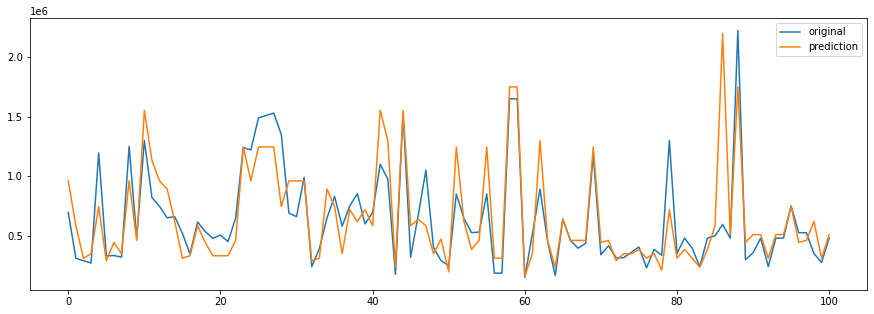

In [20]:
x_ax = range(len(test_predict))
plt.figure(figsize=(15,5))
plt.plot(x_ax, test_sale_dummy['price'], label='original')
plt.plot(x_ax, test_predict, label='prediction')
plt.legend()
plt.show()

In [6]:

#since it gives a  low score with the test data, this is a good opportunity to use the ensemble method with the xgboost library in the next cells 


In [13]:
data_dmatrix = xgb.DMatrix(data= x_trainsale, label=y_trainsale)

parameters3 = {'booster':'gbtree',
                'objective':'reg:squarederror',
                'learning_rate':0.6,
                'reg_alpha':40, 
                'max_depth':40} #this parameters seems promising


cv_results = xgb.cv(dtrain=data_dmatrix, 
                    params=parameters3, 
                    nfold = 5,
                    num_boost_round=40,  
                    metrics="mape", as_pandas=True, seed=2)

cv_results

,train-mape-mean,train-mape-std,test-mape-mean,test-mape-std
0,0.389619,7.212644e-04,0.392047,0.012489
1,0.178523,2.241224e-03,0.230359,0.016852
2,0.093326,1.628866e-03,0.203137,0.017835
3,0.051329,1.182908e-03,0.197259,0.023133
4,0.029806,8.174562e-04,0.195945,0.025300
5,0.017881,6.170796e-04,0.196647,0.025893
6,0.010914,4.241061e-04,0.197331,0.027528
7,0.006809,3.319910e-04,0.197888,0.028652
8,0.004337,2.407061e-04,0.198568,0.029641
9,0.002798,1.616841e-04,0.198947,0.029957


In [14]:
xgb_regr2 = xgb.XGBRegressor(booster='gbtree', 
                    objective ='reg:squarederror', learning_rate=0.6, 
                    reg_alpha = 40, n_estimators = 30, max_depth=6)

xgb_regr2.fit(x_trainsale, y_trainsale)
xgpredict2 = xgb_regr2.predict(x_testsale)
print(np.sqrt(mean_absolute_percentage_error(y_testsale, xgpredict2))) #promising results

0.45925606175876704
C:\Users\Sebas!\AppData\Local\Programs\Python\Python38\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


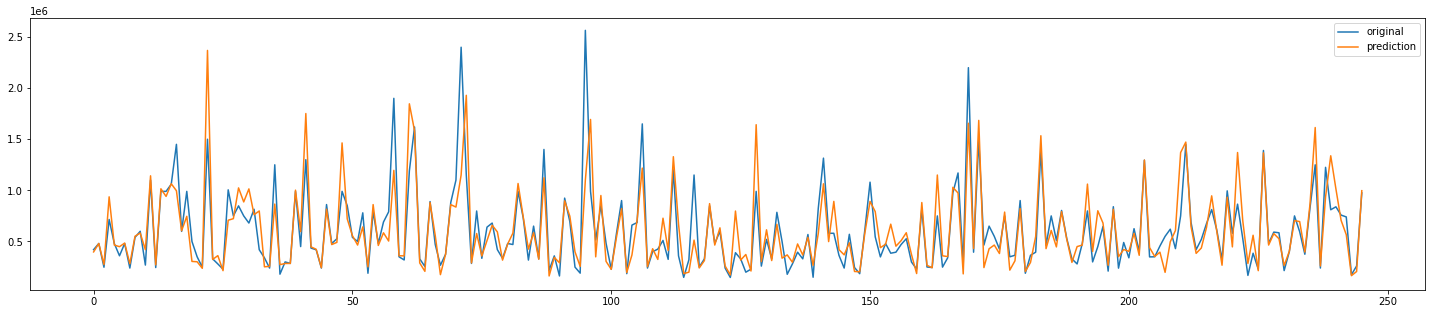

In [15]:
x_ax = range(len(y_testsale))
plt.figure(figsize=(25,5))
plt.plot(x_ax, y_testsale, label='original')
plt.plot(x_ax, xgpredict2, label='prediction')
plt.legend()
plt.show()

In [16]:
prediction_test = xgb_regr2.predict(test_sale_dummy[['size', 'rooms', 'bathrooms', 'latitude', 'longitude', 'floorNumeric', 'propertyType_duplex','propertyType_flat', 'propertyType_penthouse', 'propertyType_studio']])

print(np.sqrt(mean_absolute_percentage_error(test_sale_dummy['price'], prediction_test))) 
#this results seems enough, it's the lowest value that i managed to get

0.4719980231482526
C:\Users\Sebas!\AppData\Local\Programs\Python\Python38\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [19]:
r2_score(test_sale_dummy['price'], prediction_test)

0.6330381694025635

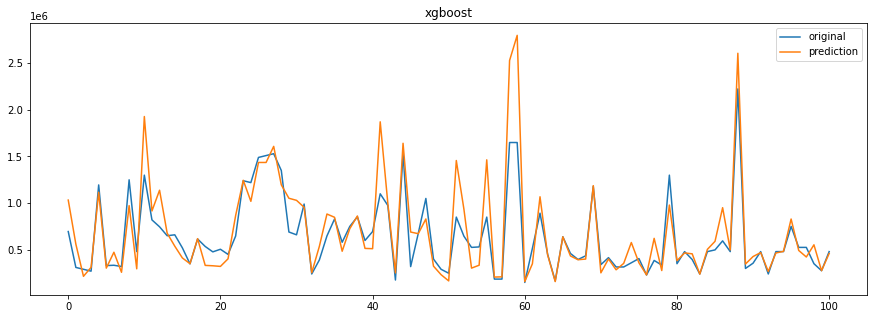

In [18]:
x_ax = range(len(prediction_test))
plt.figure(figsize=(15,5))
plt.title('xgboost')
plt.plot(x_ax, test_sale_dummy['price'], label='original')
plt.plot(x_ax, prediction_test, label='prediction')
plt.legend()
plt.show()

In [32]:
xgb_regr2.save_model("sale_model.json")